PID Controller Notebook

Tutors
* OpenAI's ChatGPT
* Anthropic's AI Claude

### High-Level Summary of a PID Controller

A **PID controller** (Proportional-Integral-Derivative controller) is a type of feedback control system commonly used in industrial control systems to regulate temperature, flow, pressure, speed, and other variables. It continuously calculates an error value, which is the difference between a desired setpoint (SP) and a measured process variable (PV), and attempts to minimize this error by adjusting the process control inputs.

The controller has three terms:
1. **Proportional (P)** – Corrects the error in proportion to its magnitude.
2. **Integral (I)** – Corrects accumulated past errors over time.
3. **Derivative (D)** – Anticipates future errors based on the rate of change.

Each term contributes to the overall control output, and the balance of these components determines how the system responds to changes in the process variable.

### PID Controller Equation

The PID controller computes the control input \( u(t) \) as:

\[
u(t) = K_p e(t) + K_i \int_0^t e(\tau) d\tau + K_d \frac{d}{dt} e(t)
\]

Where:
- \( u(t) \) is the control signal at time \( t \).
- \( e(t) = SP - PV \) is the error signal at time \( t \), which is the difference between the setpoint \( SP \) and the process variable \( PV \).
- \( K_p \), \( K_i \), and \( K_d \) are the proportional, integral, and derivative gains, respectively.

### Table Glossary of Symbols and Terms

| Symbol    | Term                         | Description                                                                 |
|-----------|------------------------------|-----------------------------------------------------------------------------|
| \( u(t) \) | Control signal               | The output from the PID controller used to adjust the process variable.      |
| \( e(t) \) | Error signal                 | The difference between the desired setpoint (SP) and the measured process variable (PV). |
| \( K_p \)  | Proportional gain            | Adjusts the output proportional to the current error.                        |
| \( K_i \)  | Integral gain                | Adjusts the output based on the cumulative sum of past errors (helps eliminate steady-state error). |
| \( K_d \)  | Derivative gain              | Adjusts the output based on the rate of change of the error (helps anticipate future errors). |
| \( SP \)   | Setpoint                     | The desired value that the system aims to reach (e.g., a target temperature). |
| \( PV \)   | Process variable             | The current measured value of the process (e.g., the actual temperature).    |
| \( t \)    | Time                         | The continuous time variable over which the control action takes place.      |
| \( \int_0^t e(\tau) d\tau \) | Integral term            | Accumulation of the error over time from the start to the current time \( t \). |
| \( \frac{d}{dt} e(t) \) | Derivative term            | The rate of change of the error signal over time. |

### How It Works
- **Proportional term (\( K_p \))**: Provides immediate response based on the size of the error. If the error is large, the controller responds strongly. However, using only proportional control can leave a steady-state error.
- **Integral term (\( K_i \))**: Corrects any residual steady-state error by accumulating the error over time and applying a correction based on the accumulated error.
- **Derivative term (\( K_d \))**: Helps to dampen the system’s response by accounting for how fast the error is changing, which reduces overshooting and oscillations.

By tuning the \( K_p \), \( K_i \), and \( K_d \) values, a balance can be achieved to make the system stable, minimize the error, and provide an optimal response to changes in the setpoint or disturbances.



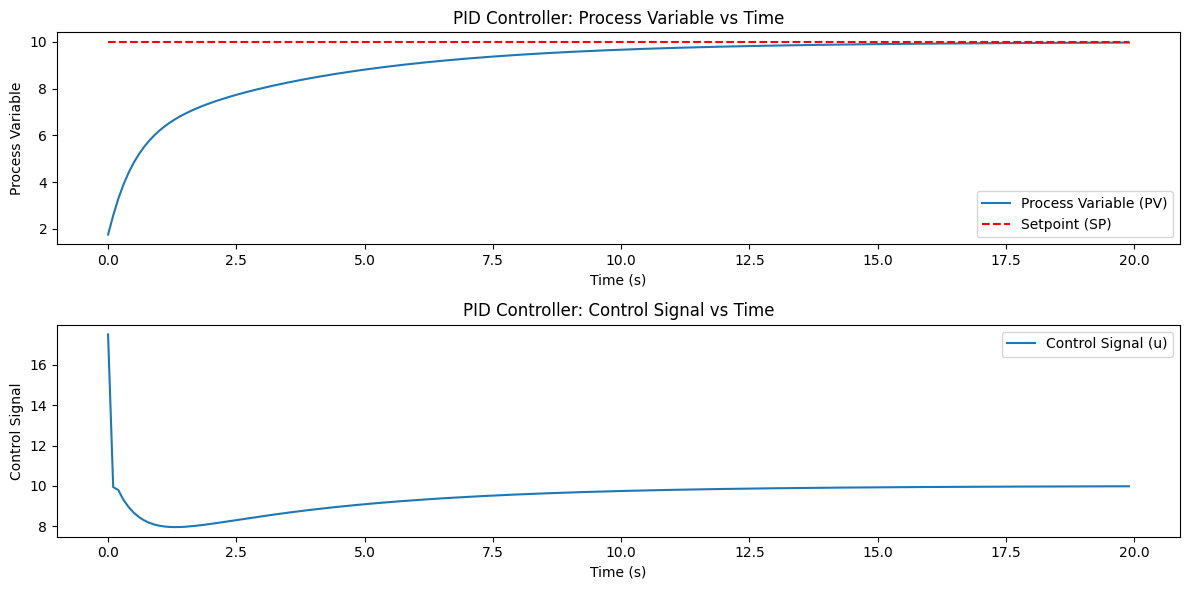

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Abstract
# This script demonstrates the implementation of a PID controller applied to a
# simple system where the goal is to regulate a process variable (PV) to reach
# a desired setpoint (SP). The controller continuously computes the error (the
# difference between SP and PV) and adjusts the control signal using proportional,
# integral, and derivative actions. The script will visualize the system's response
# over time using graphs.

# PID Controller class definition
class PIDController:
    def __init__(self, Kp, Ki, Kd, setpoint):
        """
        Initialize the PID controller with given gains and setpoint.

        Parameters:
        Kp: Proportional gain
        Ki: Integral gain
        Kd: Derivative gain
        setpoint: Desired target value for the process variable
        """
        self.Kp = Kp
        self.Ki = Ki
        self.Kd = Kd
        self.setpoint = setpoint
        self.integral = 0
        self.prev_error = 0

    def compute(self, pv, dt):
        """
        Compute the control signal based on the current process variable (pv) and time step (dt).

        Parameters:
        pv: Current process variable (measured value)
        dt: Time step

        Returns:
        control_signal: The output control signal
        """
        # Calculate error
        error = self.setpoint - pv

        # Proportional term
        P = self.Kp * error

        # Integral term (accumulating error over time)
        self.integral += error * dt
        I = self.Ki * self.integral

        # Derivative term (rate of change of error)
        derivative = (error - self.prev_error) / dt
        D = self.Kd * derivative

        # Update previous error for next derivative calculation
        self.prev_error = error

        # Compute total control signal
        control_signal = P + I + D
        return control_signal

# Define system model
def system_model(u, pv, dt):
    """
    Simulate the system's response to the control signal (u).

    Parameters:
    u: Control signal
    pv: Current process variable
    dt: Time step

    Returns:
    new_pv: Updated process variable based on control input
    """
    # Simple system model: Process variable changes in response to control signal
    # Here we assume a basic dynamic where the process variable responds to the control
    # signal with some inertia (e.g., a first-order lag system).
    alpha = 0.9  # Inertia factor (0.9 means a slow response to control)
    new_pv = alpha * pv + (1 - alpha) * u  # Update PV based on inertia and control signal
    return new_pv

# Simulation parameters
dt = 0.1        # Time step (seconds)
time = np.arange(0, 20, dt)  # Time vector from 0 to 20 seconds
setpoint = 10   # Desired setpoint for the process variable

# PID controller parameters
Kp = 1.2  # Proportional gain
Ki = 0.5  # Integral gain
Kd = 0.05  # Derivative gain

# Initialize PID controller
pid = PIDController(Kp, Ki, Kd, setpoint)

# Simulation variables
pv = 0  # Initial process variable
pv_values = []  # Store PV values for plotting
setpoint_values = []  # Store setpoint values for plotting
control_signals = []  # Store control signal values for plotting

# Run the simulation loop
for t in time:
    # Compute control signal using PID controller
    control_signal = pid.compute(pv, dt)

    # Update the process variable based on the control signal
    pv = system_model(control_signal, pv, dt)

    # Store values for plotting
    pv_values.append(pv)
    setpoint_values.append(setpoint)
    control_signals.append(control_signal)

# Plot results
plt.figure(figsize=(12, 6))

# Plot Process Variable vs Time
plt.subplot(2, 1, 1)
plt.plot(time, pv_values, label="Process Variable (PV)")
plt.plot(time, setpoint_values, 'r--', label="Setpoint (SP)")
plt.xlabel('Time (s)')
plt.ylabel('Process Variable')
plt.title('PID Controller: Process Variable vs Time')
plt.legend()

# Plot Control Signal vs Time
plt.subplot(2, 1, 2)
plt.plot(time, control_signals, label="Control Signal (u)")
plt.xlabel('Time (s)')
plt.ylabel('Control Signal')
plt.title('PID Controller: Control Signal vs Time')
plt.legend()

# Show plots
plt.tight_layout()
plt.show()



### Abstract

This Python script demonstrates a basic PID controller application for controlling a process variable (PV) to reach a desired setpoint (SP). The controller uses three components—proportional (P), integral (I), and derivative (D)—to compute the control signal that influences the system. The script simulates how the PID controller adjusts the control signal based on the error between the setpoint and the process variable over time, and visualizes the response through graphs showing both the process variable and control signal.

### Key Features:
- **System Simulation:** The system's behavior is modeled as a simple dynamic system that responds to the control signal with some delay (modeled as inertia).
- **PID Calculation:** The PID controller computes a control signal based on the error between the setpoint and the process variable using proportional, integral, and derivative components.
- **Graphs:** The results include two graphs:
  1. Process Variable vs. Time: Shows how the process variable responds and tracks the setpoint.
  2. Control Signal vs. Time: Shows how the PID controller adjusts the control signal over time.

### How to Run:
1. Install the required libraries (if not installed): `numpy` and `matplotlib`
   ```bash
   pip install numpy matplotlib
   ```
2. Run the script. It will display two plots showing the PID controller's effect on the process variable and the control signal over time.

Review of the script and the output graphs:

Script Review:

1. Structure and Implementation:
   - The script is well-structured, with clear separation of the PID controller class, system model, and simulation loop.
   - The PIDController class is properly implemented with initialization and compute methods.
   - The system_model function simulates a simple first-order lag system, which is a reasonable approximation for many real-world processes.

2. PID Controller:
   - The PID algorithm is correctly implemented, calculating proportional, integral, and derivative terms.
   - The use of a time step (dt) in calculations is good practice for discrete-time simulations.

3. Simulation Parameters:
   - The simulation runs for 20 seconds with a 0.1-second time step, providing a good resolution for observing system dynamics.
   - PID gains (Kp = 1.2, Ki = 0.5, Kd = 0.05) are set to reasonable initial values.
   - The setpoint is set to 10, and the process variable starts at 0, allowing observation of the step response.

4. Visualization:
   - The script creates two subplots: one for the process variable vs. time, and another for the control signal vs. time.
   - This separation allows for clear visualization of both the system response and the controller's actions.

Output Graph Analysis:

1. Process Variable vs. Time (Upper Plot):
   - The process variable (blue line) starts at 0 and rises towards the setpoint of 10 (red dashed line).
   - The response is overdamped, with no overshoot, indicating a conservative tuning of the PID controller.
   - The system reaches about 95% of the setpoint value in approximately 10 seconds.
   - There's a small steady-state error visible, as the process variable doesn't quite reach the setpoint by the end of the simulation.

2. Control Signal vs. Time (Lower Plot):
   - The control signal initially spikes to a high value (around 17) in response to the large initial error.
   - It then quickly decreases and settles to a value slightly above 10.
   - The smooth curve of the control signal suggests that the derivative term is not overly aggressive.

Overall Assessment:
- The system demonstrates a stable, albeit somewhat slow, response to the step change in setpoint.
- The lack of overshoot suggests a conservative tuning, prioritizing stability over speed of response.
- The small steady-state error indicates that the integral term might benefit from a slight increase.

Potential Improvements:
1. Increase the integral gain (Ki) slightly to eliminate the steady-state error.
2. Consider increasing the proportional gain (Kp) to achieve a faster rise time, if the application allows for some overshoot.
3. Experiment with different system model parameters (e.g., adjusting the alpha value) to simulate various process dynamics.
4. Add functionality to introduce disturbances or setpoint changes during the simulation to test the controller's robustness.

In conclusion, this script provides an excellent demonstration of a PID controller applied to a simple system. It offers a solid foundation for further experimentation and learning about PID control dynamics.